## Hubway Analysis - C4 Evaluation
#### Jean CASSOU-MOUNAT
Data : http://files.hubwaydatachallenge.org/hubway_2011_07_through_2013_11.zip

In [1]:
import pandas as pd
from ipyleaflet import Marker, Map, Popup, Polyline, CircleMarker
from ipywidgets import HTML
import plotly.offline as py
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
py.init_notebook_mode(connected=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## DATA ANALYSIS

### Read Data and create yearly dataframes

In [3]:
hubway_stations = pd.read_csv("../data/hubway_stations.csv")
hubway_trips = pd.read_csv("../data/hubway_trips.csv")

In [4]:
hubway_stations.head(2)

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing


In [6]:
hubway_trips.head(2)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male


### Read datetime data

In [7]:
trips_df = pd.read_csv('../data/hubway_trips.csv', parse_dates=['start_date'])
trips_df.set_index('seq_id', inplace=True)
parsed_dates = pd.to_datetime(trips_df['start_date'], format = '%m/%d/%Y %H:%M:%S')
parsed_dates = parsed_dates.apply(lambda x: x.replace(minute=0))
trips_df.start_date = parsed_dates

### Merge stations and trips in a single dataframe

In [8]:
## Merge trips and stations data

hubway_stations_start_merge = hubway_stations[['id', 'terminal', 'station', 'lat', 'lng']]
hubway_stations_start_merge = hubway_stations_start_merge.rename(columns={'id': 'strt_statn'})
hubway_trips_start = hubway_trips.merge(hubway_stations_start_merge, on='strt_statn', how='left')
hubway_trips_start = hubway_trips_start.rename(columns={'terminal': 'strt_terminal', 'station' : 'strt_station',
                                                        'lat' : 'strt_lat', 'lng' : 'strt_lng'})

hubway_stations_end_merge = hubway_stations[['id', 'terminal', 'station', 'lat', 'lng']]
hubway_stations_end_merge = hubway_stations_end_merge.rename(columns={'id': 'end_statn'})
hubway_trips_end = hubway_trips_start.merge(hubway_stations_end_merge, on='end_statn', how='left')
hubway_trips_end = hubway_trips_end.rename(columns={'terminal': 'end_terminal', 'station' : 'end_station',
                                                        'lat' : 'end_lat', 'lng' : 'end_lng'})

hubway_trips_merged = hubway_trips_end

In [9]:
hubway_trips_merged.head(2)

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,...,birth_date,gender,strt_terminal,strt_station,strt_lat,strt_lng,end_terminal,end_station,end_lat,end_lng
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,...,1976.0,Male,B32008,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,B32008,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,...,1966.0,Male,B32008,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364,B32008,Mayor Thomas M. Menino - Government Center,42.359677,-71.059364


### Display stations on Map

In [10]:
hubway_stations_latlng = [tuple(x) for x in hubway_stations[['lat', 'lng', 'station', 'id']].values]

In [11]:
group_trips_od_df= trips_df.groupby(['strt_statn', 'end_statn'])['status'].count()
group_trips_od_df.index.name = 'start_stn'
group_trips_od_df.name = 'trip_counts'
list_lines = group_trips_od_df.sort_values(ascending=False).to_dict() # show it on map

In [12]:
dict_stations = hubway_stations.set_index('id').to_dict('index')
dict_stations[67.0]['lat']

42.3581

In [13]:
m = Map(center=(42.35, -71.1), zoom=13)
for station in hubway_stations_latlng :
    circle_marker = CircleMarker(stroke = False, fill_opacity = 0.5)
    circle_marker.location = station[:-2]
    circle_marker.radius = int(1000 * hubway_trips['strt_statn'].value_counts()[station[3]]/hubway_trips['strt_statn'].value_counts().sum())
    circle_marker.color = "red"
    circle_marker.fill_color = "red"
    m.add_layer(circle_marker);
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [22]:
m_line = Map(center=(42.35, -71.1), zoom=13)
for station in hubway_stations_latlng :
    circle_marker = CircleMarker(stroke = False, fill_opacity = 0.5)
    circle_marker.location = station[:-2]
    circle_marker.radius = int(1000 * hubway_trips['strt_statn'].value_counts()[station[3]]/hubway_trips['strt_statn'].value_counts().sum())
    circle_marker.color = "red"
    circle_marker.fill_color = "red"
    m_line.add_layer(circle_marker);
display(m_line)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [24]:
for key, value in list_lines.items():
    if value >= 600 : 
        lat_0 = dict_stations[key[0]]['lat']
        lon_0 = dict_stations[key[0]]['lng']
        lat_1 = dict_stations[key[1]]['lat']
        lon_1 = dict_stations[key[1]]['lng']
        line = Polyline(
            locations = [[
            [[lat_0, lon_0],
             [lat_1, lon_1]],]],
            color = "green",
            fill_color = "green", 
            opacity=float(value)/5185,
            weight=2)
        m_line.add_layer(line)

### Count trips

Count trips on hourly basis

In [13]:
group_trips_df= trips_df.groupby('start_date')['status'].count()
group_trips_df.index.name = 'date_time'
group_trips_df.name = 'trip_counts'
group_trips_df.head(3)

date_time
2011-07-28 10:00:00     8
2011-07-28 11:00:00     4
2011-07-28 12:00:00    66
Name: trip_counts, dtype: int64

Count trips on weekday basis, depending on the station

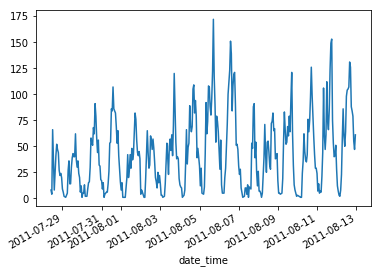

In [14]:
group_trips_df.loc['2011-07-28':'2011-08-12'].plot()

In [15]:
trips_df_weekdays = trips_df
trips_df_weekdays['weekday'] = trips_df_weekdays['start_date'].dt.day_name()
group_weekday_df= trips_df.groupby(['weekday', 'strt_statn'])['status'].count()
group_weekday_df.index.name = 'week_day'
group_weekday_df.name = 'trip_counts'
group_weekday_df.sort_values(ascending=False).head(20)

weekday    strt_statn
Tuesday    22.0          10295
Wednesday  22.0          10193
Thursday   22.0           9832
Monday     22.0           9796
Friday     22.0           9172
Saturday   36.0           6968
           53.0           6120
Friday     36.0           6084
Sunday     36.0           6071
Tuesday    36.0           6045
Wednesday  36.0           5850
Monday     36.0           5798
Thursday   36.0           5755
Sunday     53.0           5639
Saturday   42.0           5496
           67.0           5453
Tuesday    16.0           5405
Saturday   58.0           5399
Wednesday  16.0           5345
Thursday   16.0           5332
Name: trip_counts, dtype: int64

Count trips on O/D Basis

## UNSUPERVISED LEARNING

In [16]:
from sklearn.cluster import KMeans

### Clustering (week days and week-end) based on duration, gender and subscription type

In [17]:
kmeans = KMeans(n_clusters=2)
trips_cluster_df = hubway_trips.set_index('seq_id')
trips_cluster_df = trips_cluster_df.drop(['start_date', 'end_date', 'bike_nr', 'zip_code', 'birth_date', 'strt_statn', 'end_statn'], axis=1)
trips_cluster_df = pd.get_dummies(trips_cluster_df, columns=['gender', 'status', 'subsc_type'])
kmeans.fit(trips_cluster_df)
labels = kmeans.labels_
kmean_results = pd.DataFrame([labels]).T
kmean_results.columns=['kmeans_w']
kmean_results.index = range(1,len(kmean_results)+1) #set indexes like seq_id
kmean_merge_trips = pd.concat([trips_df, kmean_results], axis=1)
kmean_merge_trips = kmean_merge_trips[['start_date', 'kmeans_w']]
kmean_merge_trips['day'] = kmean_merge_trips.start_date.apply(date.weekday)
kmean_merge_trips['day_bin'] = np.where(kmean_merge_trips['day']<5, 1, 0)
kmean_merge_trips['result'] = np.where(kmean_merge_trips['kmeans_w'] == kmean_merge_trips['day_bin'], True, False)
print('kmeans score : ' + str(kmean_merge_trips.result.value_counts()[True]/labels.size))

kmeans score : 0.5158468041987936


### Clustering (week days and week-end) based on hourly rent

In [18]:
kmeans_h = KMeans(n_clusters=2, random_state=24)
trips_hourly_kmeans = group_trips_df.to_frame()
kmeans_h.fit(trips_hourly_kmeans)
labels_h = kmeans_h.labels_
kmean_results_h = pd.DataFrame([labels_h]).T
kmean_results_h.columns=['kmeans_w']
trips_hourly_kmeans_new_index = trips_hourly_kmeans.reset_index()
kmean_merge_trips_h = pd.concat([trips_hourly_kmeans_new_index, kmean_results_h], axis=1)
kmean_merge_trips_h['day'] = kmean_merge_trips_h.date_time.apply(date.weekday)
kmean_merge_trips_h['day_bin'] = np.where(kmean_merge_trips_h['day']<5, 1, 0)
kmean_merge_trips_h['result'] = np.where(kmean_merge_trips_h['kmeans_w'] == kmean_merge_trips_h['day_bin'], True, False)
print('kmeans score : ' + str(kmean_merge_trips_h.result.value_counts()[True]/labels_h.size))

kmeans score : 0.6038877183443213


In [19]:
kmean_merge_trips_h_x = kmean_merge_trips_h.index
kmean_merge_trips_h_y_result = kmean_merge_trips_h.kmeans_w
kmean_merge_trips_h_y_day_bin = kmean_merge_trips_h.day_bin

### Clustering (OD patterns)

In [20]:
a = trips_df[['strt_statn', 'end_statn']]
a['year'] = trips_df['start_date'].dt.year.values
a['month'] = trips_df['start_date'].dt.month.values
a['day'] = trips_df['start_date'].dt.day.values
a['hour'] = trips_df['start_date'].dt.hour.values
a = a.dropna()

In [21]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(a)

In [22]:
y_kmeans = kmeans.predict(a)

In [23]:
x_kmeans = a[['strt_statn', 'end_statn']].values

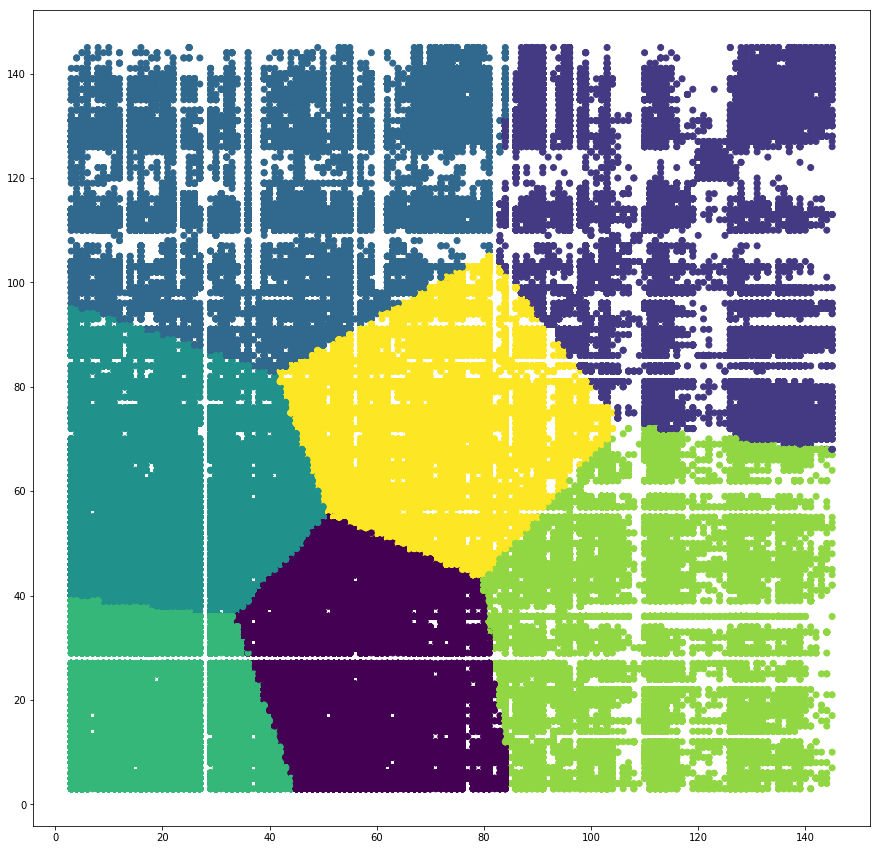

In [24]:
plt.figure(figsize=(15, 15))
plt.scatter(x_kmeans[:, 0], x_kmeans[:, 1], c=y_kmeans)

In [25]:
a['kmeans_results'] = y_kmeans
a['date'] = pd.to_datetime(a[['year', 'month', 'day']]).values
a['week_day'] = a.date.apply(date.weekday)

In [26]:
list_a = a[['week_day', 'kmeans_results']].values.tolist()
list_tuples = [tuple(l) for l in list_a]
list_possibilities = set(list_tuples)

In [27]:
for i in list_possibilities :
    print(str(i) + " " + str(list_tuples.count(i)) + " occurencies")

(1, 3) 47302 occurencies
(6, 6) 35280 occurencies
(3, 0) 53310 occurencies
(5, 6) 39158 occurencies
(0, 2) 21354 occurencies
(2, 1) 19982 occurencies
(6, 2) 15348 occurencies
(1, 6) 33219 occurencies
(5, 1) 17617 occurencies
(0, 3) 47172 occurencies
(2, 5) 20687 occurencies
(4, 0) 54381 occurencies
(1, 2) 21638 occurencies
(3, 3) 48374 occurencies
(5, 5) 15425 occurencies
(4, 4) 37949 occurencies
(6, 3) 40187 occurencies
(1, 5) 20160 occurencies
(5, 0) 52839 occurencies
(0, 4) 37574 occurencies
(3, 6) 34765 occurencies
(2, 2) 22780 occurencies
(4, 1) 18564 occurencies
(1, 1) 19497 occurencies
(6, 4) 28469 occurencies
(5, 4) 29985 occurencies
(0, 0) 52819 occurencies
(2, 6) 34701 occurencies
(3, 2) 21521 occurencies
(4, 5) 18260 occurencies
(5, 2) 17309 occurencies
(6, 0) 47683 occurencies
(1, 4) 37738 occurencies
(2, 3) 48647 occurencies
(0, 5) 19151 occurencies
(4, 2) 19942 occurencies
(1, 0) 52259 occurencies
(6, 5) 13119 occurencies
(5, 3) 43451 occurencies
(3, 5) 19732 occurencies


In [28]:
trips_df.groupby(['start_date', 'strt_statn', 'end_statn'])['status'].count()

start_date           strt_statn  end_statn
2011-07-28 10:00:00  23.0        23.0         8
2011-07-28 11:00:00  23.0        23.0         1
                     47.0        40.0         3
2011-07-28 12:00:00  3.0         3.0          1
                     5.0         23.0         1
                     10.0        41.0         1
                     16.0        16.0         1
                                 22.0         1
                     20.0        43.0         3
                     22.0        14.0         1
                                 20.0         2
                                 22.0         8
                                 25.0         1
                                 31.0         2
                                 36.0         2
                                 38.0         1
                                 40.0         1
                                 42.0         1
                                 44.0         1
                                 45.0        

## SUPERVISED LEARNING - HOURLY DATA (from 2012-10-01 13:00:00 to 2013-11-30 23:00:00)

### Hourly Trend

In [29]:
import seaborn as sns

In [30]:
df_hourly_rent = group_trips_df.to_frame()
hour = pd.to_datetime(df_hourly_rent.index).hour
df_hourly_rent['hour'] = hour

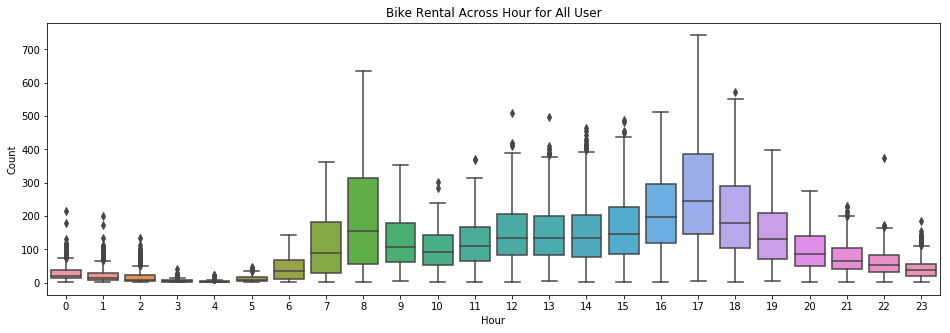

In [31]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 5)

sns.boxplot(data=df_hourly_rent,y="trip_counts",x="hour",orient="v",ax=axes)

axes.set(xlabel='Hour', ylabel='Count',title="Bike Rental Across Hour for All User")

plt.show()

In [32]:
# Casual
group_trips_casual = trips_df.groupby(['subsc_type', 'start_date'])['status'].count()['Casual']
group_trips_casual.index.name = 'date_time'
group_trips_casual.name = 'trip_counts'
df_hourly_rent_casual = group_trips_casual.to_frame()
hour_casual = pd.to_datetime(df_hourly_rent_casual.index).hour
df_hourly_rent_casual['hour'] = hour_casual

# Registered
group_trips_registered = trips_df.groupby(['subsc_type', 'start_date'])['status'].count()['Registered']
group_trips_registered.index.name = 'date_time'
group_trips_registered.name = 'trip_counts'
df_hourly_rent_registered = group_trips_registered.to_frame()
hour_registered = pd.to_datetime(df_hourly_rent_registered.index).hour
df_hourly_rent_registered['hour'] = hour_registered

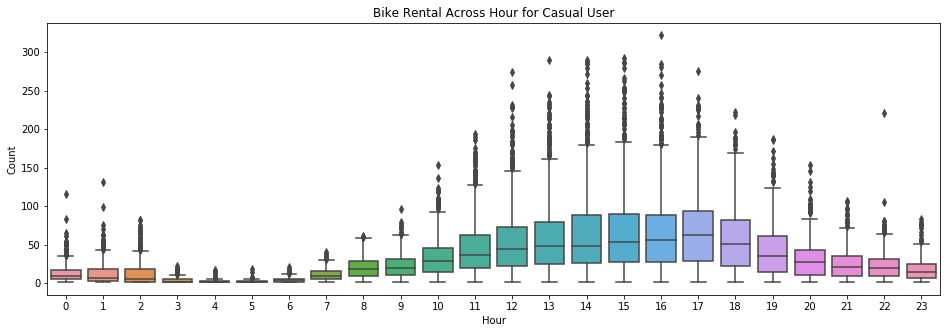

In [33]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 5)

sns.boxplot(data=df_hourly_rent_casual,y="trip_counts",x="hour",orient="v",ax=axes)

axes.set(xlabel='Hour', ylabel='Count',title="Bike Rental Across Hour for Casual User")

plt.show()

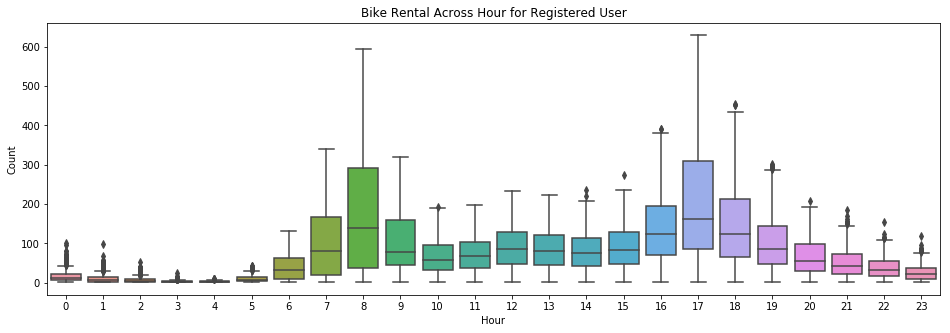

In [34]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 5)

sns.boxplot(data=df_hourly_rent_registered,y="trip_counts",x="hour",orient="v",ax=axes)

axes.set(xlabel='Hour', ylabel='Count',title="Bike Rental Across Hour for Registered User")

plt.show()

### Load hourly weather data

In [35]:
hourly_temperature = pd.read_csv('../data/hourly_data/temperature.csv', usecols = ['datetime', 'Boston'])
hourly_temperature = hourly_temperature.set_index('datetime')
hourly_temperature.columns = ['temperature']
hourly_humidity = pd.read_csv('../data/hourly_data/humidity.csv', usecols = ['datetime', 'Boston'])
hourly_humidity = hourly_humidity.set_index('datetime')
hourly_humidity.columns = ['humidity']
hourly_pressure = pd.read_csv('../data/hourly_data/pressure.csv', usecols = ['datetime', 'Boston'])
hourly_pressure = hourly_pressure.set_index('datetime')
hourly_pressure.columns = ['pressure']
hourly_wind_speed = pd.read_csv('../data/hourly_data/wind_speed.csv', usecols = ['datetime', 'Boston'])
hourly_wind_speed = hourly_wind_speed.set_index('datetime')
hourly_wind_speed.columns = ['wind_speed']
hourly_wind_direction = pd.read_csv('../data/hourly_data/wind_direction.csv', usecols = ['datetime', 'Boston'])
hourly_wind_direction = hourly_wind_direction.set_index('datetime')
hourly_wind_direction.columns = ['wind_direction']
hourly_weather_description = pd.read_csv('../data/hourly_data/weather_description.csv', usecols = ['datetime', 'Boston'])
hourly_weather_description = hourly_weather_description.set_index('datetime')
hourly_weather_description.columns = ['weather_description']

In [36]:
hourly_weather_data = pd.concat([hourly_humidity, hourly_temperature, hourly_pressure, hourly_wind_speed, hourly_wind_direction, hourly_weather_description], axis=1)
hourly_weather_data = hourly_weather_data['2012-10-01 13:00:00' : '2013-11-30 23:00:00']
hourly_weather_data = pd.get_dummies(hourly_weather_data, columns=['weather_description'])

In [37]:
hourly_trips = group_trips_df.to_frame()['2012-10-01 13:00:00' : '2013-11-30 23:00:00']

In [38]:
hourly_weather_trips_data = pd.concat([hourly_trips, hourly_weather_data], axis=1)
hourly_weather_trips_data = hourly_weather_trips_data.dropna()

In [39]:
hourly_weather_trips_data.head()

,trip_counts,humidity,temperature,pressure,wind_speed,wind_direction,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,...,weather_description_moderate rain,weather_description_overcast clouds,weather_description_proximity thunderstorm,weather_description_scattered clouds,weather_description_sky is clear,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain
2012-10-01 13:00:00,133.0,68.0,287.170000,1014.0,3.0,60.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2012-10-01 14:00:00,149.0,68.0,287.186092,1014.0,3.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 15:00:00,136.0,68.0,287.231672,1014.0,3.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 16:00:00,247.0,68.0,287.277251,1014.0,3.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 17:00:00,428.0,68.0,287.322831,1014.0,3.0,61.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=hourly_weather_trips_data.index.min(), end=hourly_weather_trips_data.index.max()).to_pydatetime()

hourly_weather_trips_holi_data = hourly_weather_trips_data.copy()
#Add holiday to db
hourly_weather_trips_holi_data['holiday'] = hourly_weather_trips_data.index.isin(holidays).astype(int)

In [41]:
hourly_weather_trips_holi_data.head()

,trip_counts,humidity,temperature,pressure,wind_speed,wind_direction,weather_description_broken clouds,weather_description_drizzle,weather_description_few clouds,weather_description_fog,...,weather_description_overcast clouds,weather_description_proximity thunderstorm,weather_description_scattered clouds,weather_description_sky is clear,weather_description_snow,weather_description_squalls,weather_description_thunderstorm,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,holiday
2012-10-01 13:00:00,133.0,68.0,287.170000,1014.0,3.0,60.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2012-10-01 14:00:00,149.0,68.0,287.186092,1014.0,3.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 15:00:00,136.0,68.0,287.231672,1014.0,3.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 16:00:00,247.0,68.0,287.277251,1014.0,3.0,60.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2012-10-01 17:00:00,428.0,68.0,287.322831,1014.0,3.0,61.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Daily Trend

In [42]:
weekday = pd.to_datetime(hourly_weather_trips_holi_data.index).weekday_name
hourly_weather_trips_holi_data['weekday'] = weekday

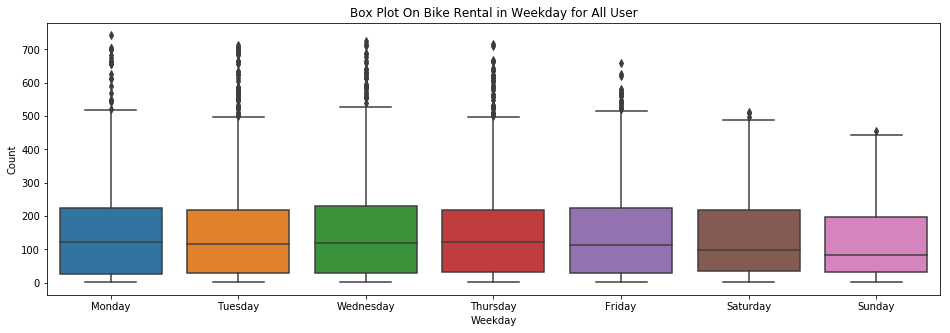

In [43]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 5)

sns.boxplot(data=hourly_weather_trips_holi_data,y="trip_counts",x="weekday",orient="v",ax=axes)

axes.set(xlabel='Weekday', ylabel='Count',title="Box Plot On Bike Rental in Weekday for All User")

plt.show()

### Holiday Trend

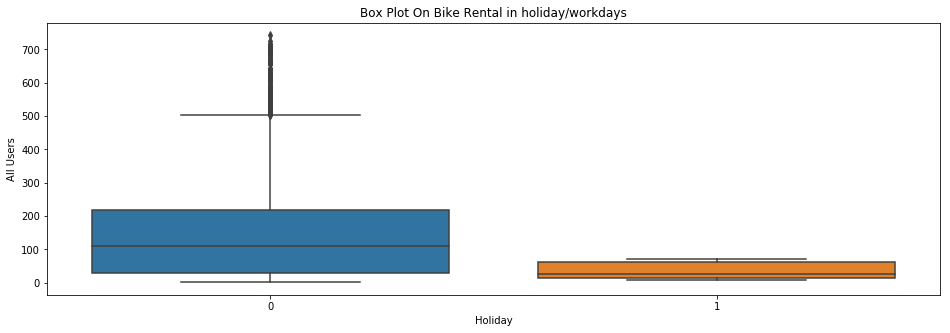

In [44]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 5)

sns.boxplot(data=hourly_weather_trips_holi_data,y="trip_counts",x="holiday",orient="v",ax=axes)

axes.set(xlabel='Holiday', ylabel='All Users',title="Box Plot On Bike Rental in holiday/workdays")

plt.show()

### Random Forest Classifier

In [45]:
labels_hourly = hourly_weather_trips_data['trip_counts'].values
features_hourly = hourly_weather_trips_data.drop(columns=['trip_counts']).values

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer


train_data, test_data, train_labels, test_labels = train_test_split(features_hourly, labels_hourly, random_state=45)

imp = Imputer()
imp.fit(train_data)
train_data_finite = imp.transform(train_data)
test_data_finite = imp.transform(test_data)

C:\Users\Jean Cassou-Mounat\Anaconda2\envs\smob\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_prediction = classifier.predict(test_data)

In [49]:
classifier.score(train_data, train_labels)

0.973604826546003

In [50]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_labels, y_prediction)

104.85132843414358

In [51]:
y_prediction_extract = y_prediction[0:100]
test_labels_extract = test_labels[0:100]

In [53]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

range_x = np.arange(len(y_prediction_extract))

# Create a trace
trace0 = go.Scatter(
    x = range_x,
    y = test_labels_extract
)

trace1 = go.Scatter(
    x = range_x,
    y = y_prediction_extract
)

data = [trace0, trace1]

py.iplot(data, filename='basic-line')